**OBSERVATIONS:**
- Dataset has two target variables.
- By using log transformation score has been increased.
- For model fitting I have used Linear Regression
- For model evaluation, I find metrics : MSE, RMSE

Energy Efficiency Analysis

In [5]:
# ABOUT DATA:
# When it comes to efficient building design, the computation of the heating load (HL) and 
# the cooling load (CL) is required to determine the specifications of the heating and cooling equipment 
# needed to maintain comfortable indoor air conditions. In order to estimate the required cooling and heating capacities,
# architects and building desioners need information about the characteristics of the building and of the conditioned space
# (for example occupancy and activity level). For this reason, we will investigate the effect of eight input variables: (RC), 
# surface area, wall area, roof area, overall height, orientation, glazing area, and glazing area distribution, to determine the 
# output variables HL and CL of residential buildings.
# This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.

**IMPORT MODULES**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('/content/energy_efficiency_data.csv')
data

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


**EXPLORATORY DATA ANALYSIS**

In [8]:
data.shape

(768, 10)

In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [11]:
data['Heating_Load']

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Heating_Load, Length: 768, dtype: float64

In [12]:
data['Cooling_Load']

0      21.33
1      21.33
2      21.33
3      21.33
4      28.28
       ...  
763    21.40
764    16.88
765    17.11
766    16.61
767    16.03
Name: Cooling_Load, Length: 768, dtype: float64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [14]:
data.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [15]:
data.count()

Relative_Compactness         768
Surface_Area                 768
Wall_Area                    768
Roof_Area                    768
Overall_Height               768
Orientation                  768
Glazing_Area                 768
Glazing_Area_Distribution    768
Heating_Load                 768
Cooling_Load                 768
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


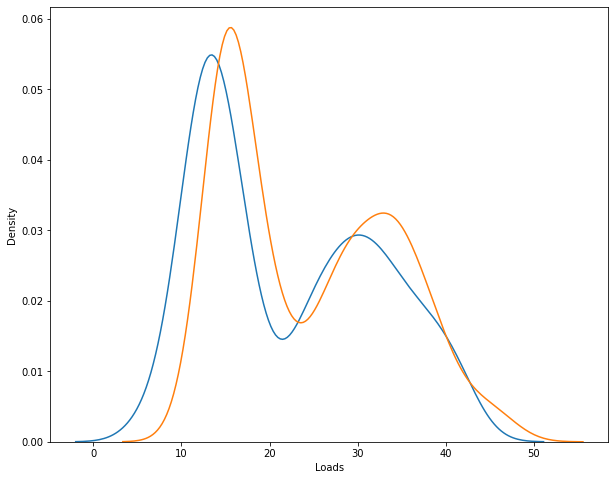

In [16]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.distplot(data['Heating_Load'],  hist = False)
sns.distplot(data['Cooling_Load'],  hist = False)
plt.xlabel('Loads')

plt.show()

In [17]:
data['Heating_Load'].mean()

22.307200520833334

In [18]:
data['Cooling_Load'].median()

22.08

In [19]:
data['Heating_Load'].value_counts()

15.16    6
13.00    5
15.55    4
10.68    4
28.15    4
        ..
10.47    1
33.21    1
36.77    1
36.71    1
16.64    1
Name: Heating_Load, Length: 586, dtype: int64

In [20]:
data['Cooling_Load'].value_counts()

21.33    4
29.79    4
14.27    4
17.20    4
14.28    4
        ..
14.65    1
14.54    1
14.39    1
14.46    1
17.11    1
Name: Cooling_Load, Length: 636, dtype: int64

In [21]:
# Correaltion

In [22]:
data['Heating_Load'].corr(data['Surface_Area'])

-0.6581202267776216

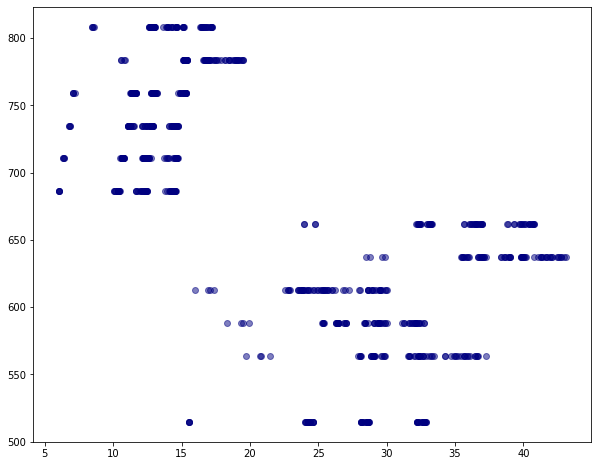

In [23]:
plt.figure(figsize = (10,8))
plt.scatter(data['Heating_Load'], data['Surface_Area'], color = 'navy', alpha = 0.5)
plt.show()

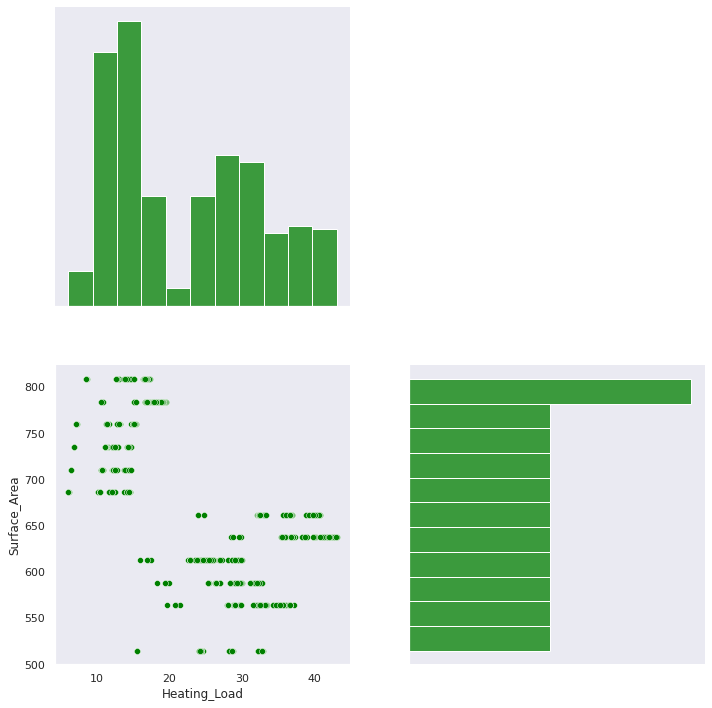

In [24]:
# with joint plot
sns.set()
sns.set_style('dark')
sns.jointplot(x = data['Heating_Load'], y = data['Surface_Area'], color = 'green', ratio = 1, height = 10)
plt.show()

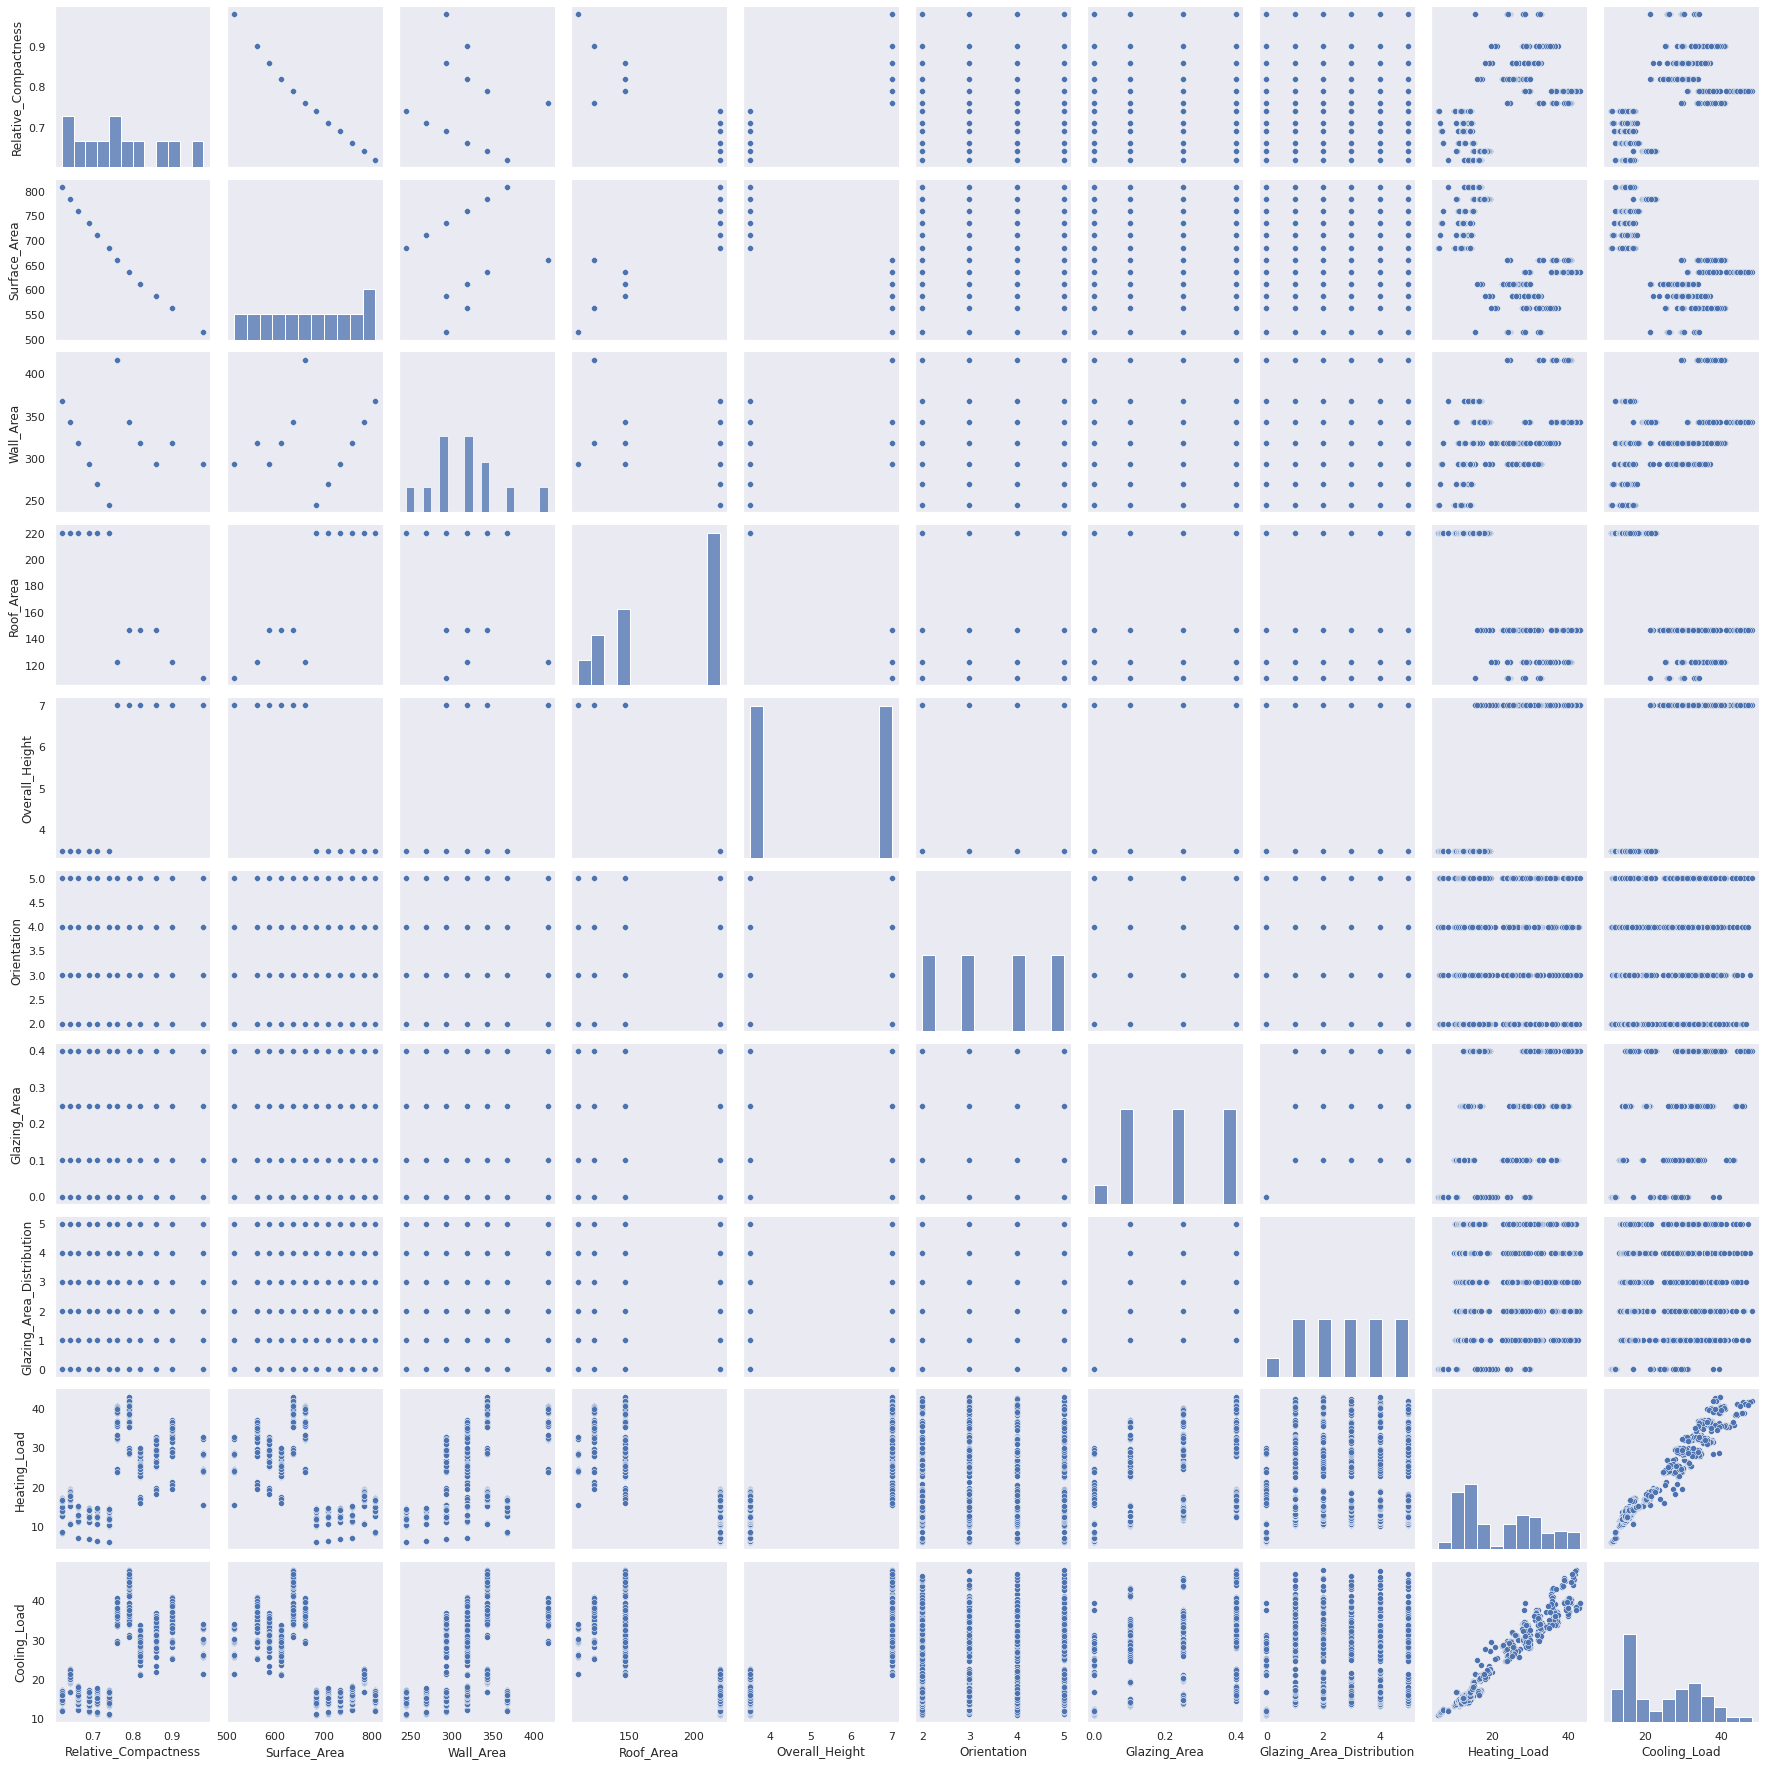

In [25]:
sns.pairplot(data)

In [26]:
# Overall correlated data

In [27]:
data.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing_Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing_Area_Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


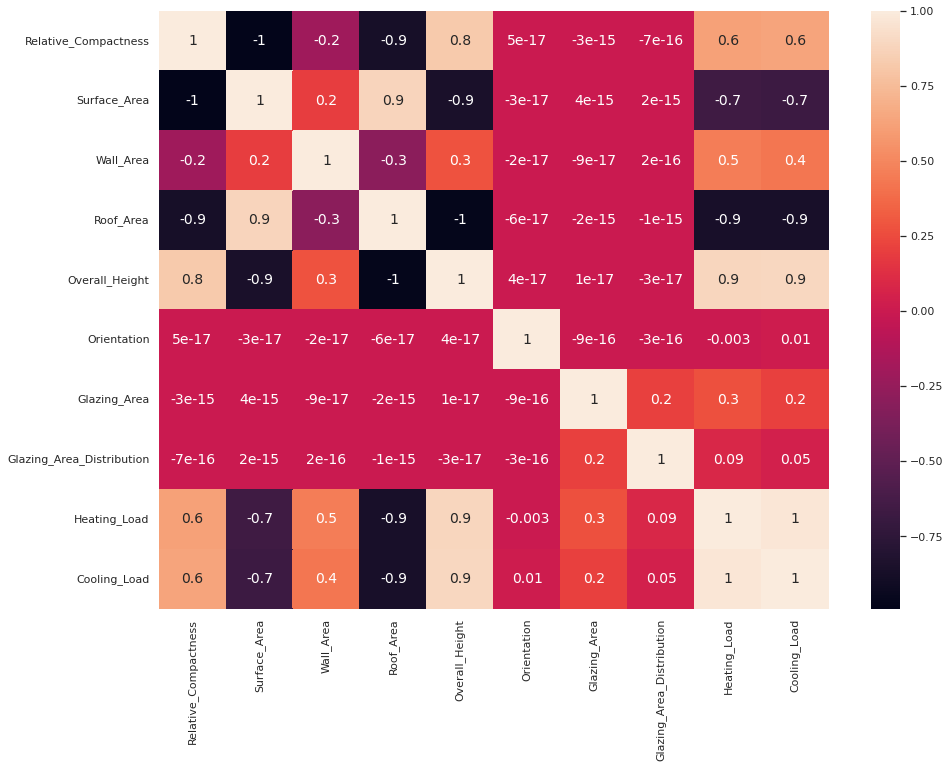

In [28]:
plt.figure(figsize = (15,11))
sns.heatmap(data.corr(), annot = True, annot_kws = {'size':14}, fmt = '.1g', mask = None)
plt.show()

In [29]:
data.corr().shape

(10, 10)

In [30]:
features = data.drop('Heating_Load', axis = 1)
features

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.61


In [31]:
features = features.drop('Cooling_Load', axis = 1)
features

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [32]:
target = data[['Cooling_Load','Heating_Load']]
target

,Cooling_Load,Heating_Load
0,21.33,15.55
1,21.33,15.55
2,21.33,15.55
3,21.33,15.55
4,28.28,20.84
...,...,...
763,21.40,17.88
764,16.88,16.54
765,17.11,16.44
766,16.61,16.48


**MODEL BUILDING**

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 7)

In [35]:
x_train

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
590,0.82,612.5,318.5,147.00,7.0,4,0.40,2
692,0.76,661.5,416.5,122.50,7.0,2,0.40,4
492,0.82,612.5,318.5,147.00,7.0,2,0.25,5
205,0.82,612.5,318.5,147.00,7.0,3,0.10,4
709,0.66,759.5,318.5,220.50,3.5,3,0.40,4
...,...,...,...,...,...,...,...,...
579,0.98,514.5,294.0,110.25,7.0,5,0.40,2
502,0.76,661.5,416.5,122.50,7.0,4,0.25,5
537,0.86,588.0,294.0,147.00,7.0,3,0.40,1
196,0.90,563.5,318.5,122.50,7.0,2,0.10,4


In [36]:
y_train

,Cooling_Load,Heating_Load
590,28.95,28.64
692,40.36,40.68
492,26.53,25.70
205,28.61,22.80
709,17.82,15.29
...,...,...
579,33.78,32.72
502,35.73,36.06
537,30.66,32.39
196,29.34,29.06


In [37]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [38]:
model1.fit(x_train, y_train)

LinearRegression()

In [39]:
model1.score(x_test, y_test)

0.8981672728854577

In [40]:
model1.intercept_

array([80.19136872, 75.08554004])

In [41]:
model1.coef_

array([[-6.05669701e+01, -8.17130442e+11,  8.17130442e+11,
         1.63426088e+12,  4.32344437e+00,  1.39873564e-01,
         1.40392654e+01,  7.86012411e-02],
       [-5.92599043e+01, -8.25999832e+11,  8.25999832e+11,
         1.65199966e+12,  4.15388775e+00, -2.74489820e-02,
         1.97960792e+01,  2.82852590e-01]])

In [42]:
pd.DataFrame(data = model1.coef_, index = y_train.columns, columns = x_train.columns)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
Cooling_Load,-60.566970,-8.171304e+11,8.171304e+11,1.634261e+12,4.323444,0.139874,14.039265,0.078601
Heating_Load,-59.259904,-8.259998e+11,8.259998e+11,1.652000e+12,4.153888,-0.027449,19.796079,0.282853


In [43]:
model1.score(x_train, y_train)

0.9035544674485991

In [44]:
model1.score(x_test, y_test)

0.8981672728854577

In [45]:
data['Cooling_Load'].skew()

0.39599246696276713

In [46]:
data['Heating_Load'].skew()

0.36044888646213086

In [47]:
target.skew()

Cooling_Load    0.395992
Heating_Load    0.360449
dtype: float64

In [48]:
# log transformation

In [49]:
log_Cooling = np.log(data['Cooling_Load'])
log_Cooling

0      3.060115
1      3.060115
2      3.060115
3      3.060115
4      3.342155
         ...   
763    3.063391
764    2.826129
765    2.839663
766    2.810005
767    2.774462
Name: Cooling_Load, Length: 768, dtype: float64

In [50]:
log_Heating = np.log(data['Heating_Load'])
log_Heating

0      2.744061
1      2.744061
2      2.744061
3      2.744061
4      3.036874
         ...   
763    2.883683
764    2.805782
765    2.799717
766    2.802148
767    2.811809
Name: Heating_Load, Length: 768, dtype: float64

In [51]:
target1 = np.log(data[['Cooling_Load','Heating_Load']])
target1

,Cooling_Load,Heating_Load
0,3.060115,2.744061
1,3.060115,2.744061
2,3.060115,2.744061
3,3.060115,2.744061
4,3.342155,3.036874
...,...,...
763,3.063391,2.883683
764,2.826129,2.805782
765,2.839663,2.799717
766,2.810005,2.802148


In [52]:
target1.skew()

Cooling_Load    0.055660
Heating_Load   -0.120768
dtype: float64

In [53]:
x_train, x_test, y_train, y_test = train_test_split(features, target1, test_size = 0.3, random_state = 7)

In [54]:
model1.fit(x_train, y_train)

LinearRegression()

In [55]:
print(model1.coef_)

[[-7.14402434e-01 -1.94192384e+10  1.94192384e+10  3.88384768e+10
   2.09336936e-01  6.04071841e-03  6.14219668e-01  4.13857587e-03]
 [ 6.79468925e-01 -2.23030251e+10  2.23030251e+10  4.46060501e+10
   2.65471756e-01 -2.19671056e-04  1.01415244e+00  1.91948283e-02]]


In [56]:
model1.intercept_

array([ 2.31841472, -0.78916715])

In [57]:
model1.score(x_train, y_train)

0.9291288822342016

In [58]:
model1.score(x_test, y_test)

0.9244209262562929

In [59]:
# So, data transformation has improved the scores....

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


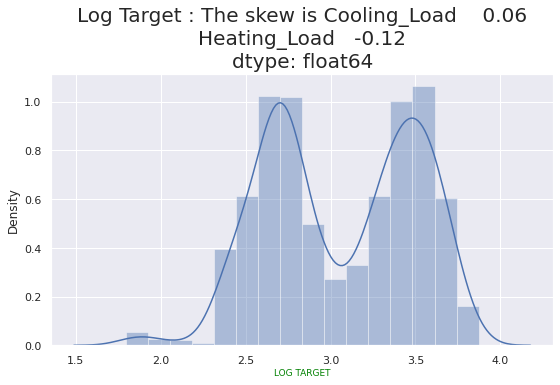

In [60]:
sns.set()
plt.figure(figsize = (9,5))
sns.distplot(target1)
plt.title(f'Log Target : The skew is {round(target1.skew(), 2)}', fontsize = 20)
plt.xlabel('LOG TARGET', fontsize = 9, color = 'green')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


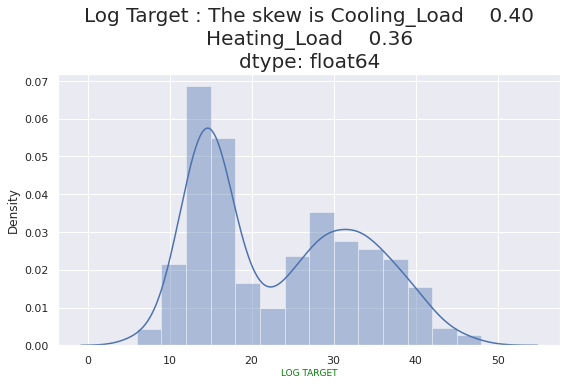

In [61]:
sns.set()
plt.figure(figsize = (9,5))
sns.distplot(data[['Cooling_Load','Heating_Load']])
plt.title(f'Log Target : The skew is {round(target.skew(), 2)}', fontsize = 20)
plt.xlabel('LOG TARGET', fontsize = 9, color = 'green')
plt.show()

In [62]:
# Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which 
# describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression).

# Variance inflation factor (VIF) is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis. 
# Multicollinearity inflates the variance and type II error. It makes the coefficient of a variable consistent but unreliable.

In [63]:
import statsmodels.api as sm

In [64]:
results = sm.OLS(y_train, x_train).fit()
results.params

,0,1
Relative_Compactness,0.516224,0.255519
Surface_Area,0.001432,0.001033
Wall_Area,0.000898,0.001662
Roof_Area,0.000267,-0.000315
Overall_Height,0.240099,0.255509
Orientation,0.006353,-0.000375
Glazing_Area,0.611337,1.014595
Glazing_Area_Distribution,0.004309,0.019200


In [65]:
sm.add_constant(x_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
590,1.0,0.82,612.5,318.5,147.00,7.0,4,0.40,2
692,1.0,0.76,661.5,416.5,122.50,7.0,2,0.40,4
492,1.0,0.82,612.5,318.5,147.00,7.0,2,0.25,5
205,1.0,0.82,612.5,318.5,147.00,7.0,3,0.10,4
709,1.0,0.66,759.5,318.5,220.50,3.5,3,0.40,4
...,...,...,...,...,...,...,...,...,...
579,1.0,0.98,514.5,294.0,110.25,7.0,5,0.40,2
502,1.0,0.76,661.5,416.5,122.50,7.0,4,0.25,5
537,1.0,0.86,588.0,294.0,147.00,7.0,3,0.40,1
196,1.0,0.90,563.5,318.5,122.50,7.0,2,0.10,4


In [66]:
results = sm.OLS(y_train, sm.add_constant(x_train)).fit()
results.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,0,1
const,2.361717,-0.738288
Relative_Compactness,-0.741264,0.648618
Surface_Area,-0.000225,0.001550
Wall_Area,0.000992,0.001633
Roof_Area,-0.000608,-0.000041
Overall_Height,0.209101,0.265200
Orientation,0.006000,-0.000265
Glazing_Area,0.613906,1.013792
Glazing_Area_Distribution,0.004179,0.019241


In [67]:
#  VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF =variance_inflation_factor(exog = sm.add_constant(x_train).values, exog_idx=8)
VIF

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


1.0655697210671269

In [68]:
# What does it mean when VIF is INF?
# If there is perfect correlation, then VIF = infinity. A large value of VIF indicates that there is a correlation between the variables.
# If the VIF is 4, this means that the variance of the model coefficient is inflated by a factor of 4 due to the presence of multicollinearity.

for i in range(1, len(sm.add_constant(x_train).columns)):

  print(variance_inflation_factor(exog = sm.add_constant(x_train).values, exog_idx = i),'\n')

107.38249318106729 

inf 

inf 

inf 

30.72261076967456 

1.0024541809788188 

1.065011163351633 

1.0655697210671269 



/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [69]:
# 
round(results.bic, 2)

-372.77

In [70]:
x_const = sm.add_constant(x_train)
m_1 = sm.OLS(y_train, x_const)
res_1 = m_1.fit()

In [71]:
round(res_1.bic, 2)

-372.77

In [72]:
results.fittedvalues

,Cooling_Load,Heating_Load
590,3.584289,3.556498
692,3.726200,3.793559
492,3.492738,3.462682
205,3.402474,3.291107
709,2.895648,2.788167
...,...,...
579,3.491770,3.469578
502,3.650293,3.660200
537,3.525669,3.485483
196,3.363088,3.268295


In [73]:
results.resid

,Cooling_Load,Heating_Load
590,-0.218719,-0.201693
692,-0.028361,-0.087822
492,-0.214462,-0.216191
205,-0.048718,-0.164346
709,-0.015327,-0.060968
...,...,...
579,0.028099,0.018409
502,-0.074302,-0.075016
537,-0.102710,-0.007634
196,0.015863,0.101068


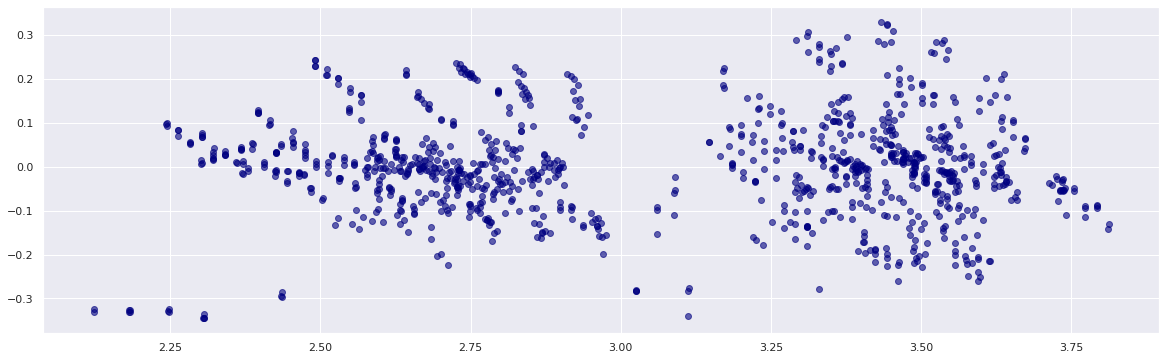

In [74]:
plt.figure(figsize=(20,6))

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)
plt.show()

In [75]:
round(results.resid.mean(),2)

Cooling_Load    0.0
Heating_Load    0.0
dtype: float64

In [76]:
round(results.resid.median(),2)

Cooling_Load   -0.01
Heating_Load    0.00
dtype: float64

In [77]:
round(results.resid.skew(),2)

Cooling_Load    0.52
Heating_Load   -0.40
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


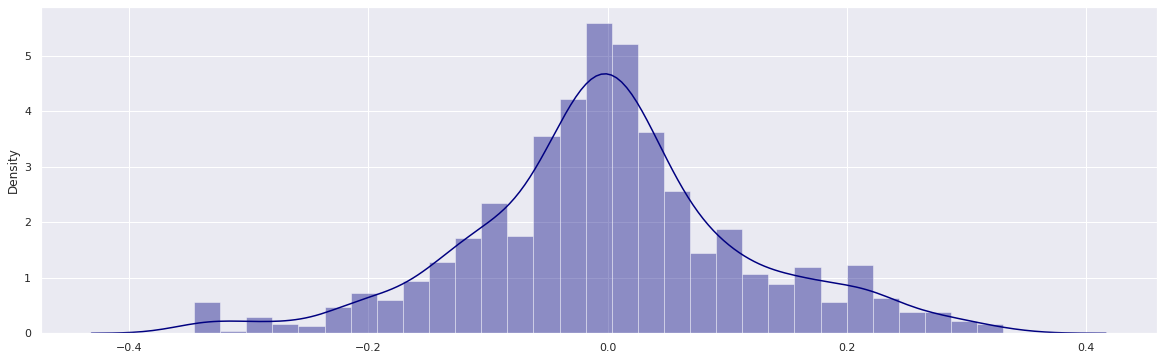

In [78]:
plt.figure(figsize= (20,6))
sns.distplot(results.resid, color='navy')
plt.show()

In [79]:
# NOTE: residuals are very close to a normal distribution

**MODEL EVALUATION METRICS**

In [81]:
predictions = model1.predict(x_test)
p = predictions - y_test
p

,Cooling_Load,Heating_Load
353,-0.091522,-0.227303
236,0.111198,0.064864
323,0.006062,-0.022495
98,0.042497,-0.015590
701,-0.022793,-0.023426
...,...,...
188,0.126737,0.058987
351,0.104292,0.188856
120,-0.011991,-0.080315
108,0.081414,0.086283


In [82]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,predictions)

0.08980973397912764

In [83]:
metrics.mean_squared_error(y_test,predictions)

0.013708526698870967

In [84]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

0.11708341769384326

In [86]:
UB = np.log(22)+2*np.sqrt(metrics.mean_squared_error(y_test,predictions))
LB = np.log(22)-2*np.sqrt(metrics.mean_squared_error(y_test,predictions))
print(UB)
print(LB)

3.3252092887460027
2.8568756179706294


In [89]:
UB_ = np.e**UB
UB_

27.80481726910099

In [90]:
LB_ = np.e**LB
LB_

17.407055594566373